In [483]:
import pandas as pd

In [484]:
df = pd.read_csv("/Users/gunik/Downloads/llm_tokenized_symptoms (1).csv")

In [485]:
df

,Unnamed: 0,VAERS_ID,extracted_symptoms
0,0,2728994,"['muscle pain', 'arm soreness', 'pain', 'activ..."
1,1,2729004,"['micro-seizures', 'seizures', 'arrest in spee..."
2,2,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
3,3,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
4,4,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
...,...,...,...
16823,16823,2733817,"['weakness', 'malaise', 'arm pain', 'chills', ..."
16824,16824,2733820,"['COVID-19', 'pneumonia']"
16825,16825,2733821,['type 1 diabetes']
16826,16826,2737168,[]


In [486]:
df = df.drop(columns=['Unnamed: 0'])

In [487]:
df

,VAERS_ID,extracted_symptoms
0,2728994,"['muscle pain', 'arm soreness', 'pain', 'activ..."
1,2729004,"['micro-seizures', 'seizures', 'arrest in spee..."
2,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
3,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
4,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
...,...,...
16823,2733817,"['weakness', 'malaise', 'arm pain', 'chills', ..."
16824,2733820,"['COVID-19', 'pneumonia']"
16825,2733821,['type 1 diabetes']
16826,2737168,[]


In [488]:
filtered_df = df[df['extracted_symptoms'].apply(lambda x: isinstance(x, list) and len(x) >= 4)]

print(filtered_df)

Empty DataFrame
Columns: [VAERS_ID, extracted_symptoms]
Index: []


In [489]:
df_filtered = df[df['extracted_symptoms'].apply(lambda x: isinstance(x, list) and len(x) >= 4)]

# Reset the index if needed
df_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
print(df_filtered)

Empty DataFrame
Columns: [VAERS_ID, extracted_symptoms]
Index: []


In [490]:
print(df['extracted_symptoms'].apply(type).value_counts())

extracted_symptoms
<class 'str'>    16828
Name: count, dtype: int64


In [491]:
import ast

# Convert string representations of lists into actual lists
df['extracted_symptoms'] = df['extracted_symptoms'].apply(
    lambda x: ast.literal_eval(x) if x.startswith('[') and x.endswith(']') else []
)


In [492]:
df_filtered = df[df['extracted_symptoms'].apply(lambda x: len(x) <= 4)]

# Reset the index
df_filtered.reset_index(drop=True, inplace=True)

print(df_filtered)

       VAERS_ID                                 extracted_symptoms
0       2728994  [muscle pain, arm soreness, pain, activities o...
1       2729006      [endocarditis, fever, chills, lung infection]
2       2729006      [endocarditis, fever, chills, lung infection]
3       2729006      [endocarditis, fever, chills, lung infection]
4       2729014                                    [shoulder pain]
...         ...                                                ...
13584   2733802  [injection site pain, injection site tendernes...
13585   2733820                              [COVID-19, pneumonia]
13586   2733821                                  [type 1 diabetes]
13587   2737168                                                 []
13588   2737595                             [fever, rash, fatigue]

[13589 rows x 2 columns]


In [493]:
df_merged = pd.merge(df_filtered,data ,how ="inner",on="VAERS_ID" )

In [494]:
df_merged

,VAERS_ID,extracted_symptoms,Unnamed: 0,VAX_TYPE,SYMPTOM_TEXT,V_ADMINBY,FORM_VERS
0,2728994,"[muscle pain, arm soreness, pain, activities o...",0,COVID19,muscle at the injection site is sore; He canno...,PHM,2
1,2729006,"[endocarditis, fever, chills, lung infection]",2,COVID19,"On September 14, 2023, I was admitted to Hospi...",PHM,2
2,2729006,"[endocarditis, fever, chills, lung infection]",3,COVID19,"On September 14, 2023, I was admitted to Hospi...",PHM,2
3,2729006,"[endocarditis, fever, chills, lung infection]",4,COVID19,"On September 14, 2023, I was admitted to Hospi...",PHM,2
4,2729006,"[endocarditis, fever, chills, lung infection]",2,COVID19,"On September 14, 2023, I was admitted to Hospi...",PHM,2
...,...,...,...,...,...,...,...
15860,2733802,"[injection site pain, injection site tendernes...",2228,COVID19,Mild injection site pain and no interference w...,UNK,2
15861,2733820,"[COVID-19, pneumonia]",2234,COVID19,she has the covid vaccine but still gets very ...,UNK,2
15862,2733821,[type 1 diabetes],2235,COVID19,she was diagnosed with type 1 diabetes; This i...,UNK,2
15863,2737168,[],2687,COVID19-2,Requested to order immunizations for patient b...,PVT,2


In [495]:
df_merged=df_merged.drop(columns=["Unnamed: 0","V_ADMINBY","FORM_VERS"])

In [496]:
df_merged

,VAERS_ID,extracted_symptoms,VAX_TYPE,SYMPTOM_TEXT
0,2728994,"[muscle pain, arm soreness, pain, activities o...",COVID19,muscle at the injection site is sore; He canno...
1,2729006,"[endocarditis, fever, chills, lung infection]",COVID19,"On September 14, 2023, I was admitted to Hospi..."
2,2729006,"[endocarditis, fever, chills, lung infection]",COVID19,"On September 14, 2023, I was admitted to Hospi..."
3,2729006,"[endocarditis, fever, chills, lung infection]",COVID19,"On September 14, 2023, I was admitted to Hospi..."
4,2729006,"[endocarditis, fever, chills, lung infection]",COVID19,"On September 14, 2023, I was admitted to Hospi..."
...,...,...,...,...
15860,2733802,"[injection site pain, injection site tendernes...",COVID19,Mild injection site pain and no interference w...
15861,2733820,"[COVID-19, pneumonia]",COVID19,she has the covid vaccine but still gets very ...
15862,2733821,[type 1 diabetes],COVID19,she was diagnosed with type 1 diabetes; This i...
15863,2737168,[],COVID19-2,Requested to order immunizations for patient b...


In [497]:
df_merged = df_merged.drop_duplicates(subset="VAERS_ID")

In [498]:
df_merged

,VAERS_ID,extracted_symptoms,VAX_TYPE,SYMPTOM_TEXT
0,2728994,"[muscle pain, arm soreness, pain, activities o...",COVID19,muscle at the injection site is sore; He canno...
1,2729006,"[endocarditis, fever, chills, lung infection]",COVID19,"On September 14, 2023, I was admitted to Hospi..."
10,2729014,[shoulder pain],COVID19-2,patient's husband reported symptoms of prolong...
11,2729015,[hives],COVID19,Patient started experiencing hives and was pre...
12,2729016,[lumps],COVID19,Have developed lumps on my thighs and wrist an...
...,...,...,...,...
15860,2733802,"[injection site pain, injection site tendernes...",COVID19,Mild injection site pain and no interference w...
15861,2733820,"[COVID-19, pneumonia]",COVID19,she has the covid vaccine but still gets very ...
15862,2733821,[type 1 diabetes],COVID19,she was diagnosed with type 1 diabetes; This i...
15863,2737168,[],COVID19-2,Requested to order immunizations for patient b...


In [499]:
df_merged.to_csv('output_1.csv',index=False)

In [500]:
df_merged

,VAERS_ID,extracted_symptoms,VAX_TYPE,SYMPTOM_TEXT
0,2728994,"[muscle pain, arm soreness, pain, activities o...",COVID19,muscle at the injection site is sore; He canno...
1,2729006,"[endocarditis, fever, chills, lung infection]",COVID19,"On September 14, 2023, I was admitted to Hospi..."
10,2729014,[shoulder pain],COVID19-2,patient's husband reported symptoms of prolong...
11,2729015,[hives],COVID19,Patient started experiencing hives and was pre...
12,2729016,[lumps],COVID19,Have developed lumps on my thighs and wrist an...
...,...,...,...,...
15860,2733802,"[injection site pain, injection site tendernes...",COVID19,Mild injection site pain and no interference w...
15861,2733820,"[COVID-19, pneumonia]",COVID19,she has the covid vaccine but still gets very ...
15862,2733821,[type 1 diabetes],COVID19,she was diagnosed with type 1 diabetes; This i...
15863,2737168,[],COVID19-2,Requested to order immunizations for patient b...


TEMPORAL ANALYSIS


In [501]:
df = pd.read_csv("symptoms_truth.csv")

In [502]:
df

,VAERS_ID,symptoms,VAX_TYPE,SYMPTOM_TEXT,Unnamed: 4
0,2791086,"['abdominal pain', 'diarrhea', 'nausea', 'thro...",COVID19-2,Approximately 15 minutes after receiving the M...,"abdominal pain,diarrhea, nausea, sore throat"
1,2783222,"['arm numbness', 'hypertension', 'dizziness', ...",COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"arm pain, dizziness, swelling, shortness of br..."
2,2746570,"['worsening asthma symptoms', 'cough', 'bronch...",COVID19,"Worsening asthma symptoms, sudden forceful co...","asthama, cough, bronchitis, bloody nose, yello..."
3,2799734,"['Atrial fibrillation', 'Weakness', 'Near-sync...",COVID19,Received these 3 vaccines at local pharmacy. D...,"atrial fibirillation, weakness, syncope, MSK i..."
4,2798860,"['red spot', 'covid toes', 'eye swelling', 'it...",COVID19,"pt has red spot on lower arm, covid toes, swel...","blood spot, covid, swelling, ichiness, rashes"
...,...,...,...,...,...
195,2729253,[],COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,NaN
196,2729254,[],COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,NaN
197,2729258,"['death', 'COVID-19']",COVID19,Death after recent Covid illness,death
198,2729823,['atrial fibrillation'],COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,artirial fibrillation


In [503]:
df = df.drop(columns='symptoms')

In [504]:
df

,VAERS_ID,VAX_TYPE,SYMPTOM_TEXT,Unnamed: 4
0,2791086,COVID19-2,Approximately 15 minutes after receiving the M...,"abdominal pain,diarrhea, nausea, sore throat"
1,2783222,COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"arm pain, dizziness, swelling, shortness of br..."
2,2746570,COVID19,"Worsening asthma symptoms, sudden forceful co...","asthama, cough, bronchitis, bloody nose, yello..."
3,2799734,COVID19,Received these 3 vaccines at local pharmacy. D...,"atrial fibirillation, weakness, syncope, MSK i..."
4,2798860,COVID19,"pt has red spot on lower arm, covid toes, swel...","blood spot, covid, swelling, ichiness, rashes"
...,...,...,...,...
195,2729253,COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,NaN
196,2729254,COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,NaN
197,2729258,COVID19,Death after recent Covid illness,death
198,2729823,COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,artirial fibrillation


In [505]:
df = df.rename(columns={'Unnamed: 4': 'SYMPTOMS'})

In [506]:
df

,VAERS_ID,VAX_TYPE,SYMPTOM_TEXT,SYMPTOMS
0,2791086,COVID19-2,Approximately 15 minutes after receiving the M...,"abdominal pain,diarrhea, nausea, sore throat"
1,2783222,COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"arm pain, dizziness, swelling, shortness of br..."
2,2746570,COVID19,"Worsening asthma symptoms, sudden forceful co...","asthama, cough, bronchitis, bloody nose, yello..."
3,2799734,COVID19,Received these 3 vaccines at local pharmacy. D...,"atrial fibirillation, weakness, syncope, MSK i..."
4,2798860,COVID19,"pt has red spot on lower arm, covid toes, swel...","blood spot, covid, swelling, ichiness, rashes"
...,...,...,...,...
195,2729253,COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,NaN
196,2729254,COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,NaN
197,2729258,COVID19,Death after recent Covid illness,death
198,2729823,COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,artirial fibrillation


In [507]:
import numpy as np
df['SYMPTOMS'] = df['SYMPTOMS'].fillna('')

In [508]:
df

,VAERS_ID,VAX_TYPE,SYMPTOM_TEXT,SYMPTOMS
0,2791086,COVID19-2,Approximately 15 minutes after receiving the M...,"abdominal pain,diarrhea, nausea, sore throat"
1,2783222,COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"arm pain, dizziness, swelling, shortness of br..."
2,2746570,COVID19,"Worsening asthma symptoms, sudden forceful co...","asthama, cough, bronchitis, bloody nose, yello..."
3,2799734,COVID19,Received these 3 vaccines at local pharmacy. D...,"atrial fibirillation, weakness, syncope, MSK i..."
4,2798860,COVID19,"pt has red spot on lower arm, covid toes, swel...","blood spot, covid, swelling, ichiness, rashes"
...,...,...,...,...
195,2729253,COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,
196,2729254,COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,
197,2729258,COVID19,Death after recent Covid illness,death
198,2729823,COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,artirial fibrillation


In [509]:
df.isna().sum()

VAERS_ID        0
VAX_TYPE        0
SYMPTOM_TEXT    0
SYMPTOMS        0
dtype: int64

In [510]:
df['SYMPTOMS'] = (
    df['SYMPTOMS']  # Start with the column
    .fillna('')  # Replace NaN with empty strings
    .apply(lambda x: [symptom.strip() for symptom in x.split(',') if symptom])  # Split by ',' and strip whitespace
)

In [511]:
df

,VAERS_ID,VAX_TYPE,SYMPTOM_TEXT,SYMPTOMS
0,2791086,COVID19-2,Approximately 15 minutes after receiving the M...,"[abdominal pain, diarrhea, nausea, sore throat]"
1,2783222,COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"[arm pain, dizziness, swelling, shortness of b..."
2,2746570,COVID19,"Worsening asthma symptoms, sudden forceful co...","[asthama, cough, bronchitis, bloody nose, yell..."
3,2799734,COVID19,Received these 3 vaccines at local pharmacy. D...,"[atrial fibirillation, weakness, syncope, MSK ..."
4,2798860,COVID19,"pt has red spot on lower arm, covid toes, swel...","[blood spot, covid, swelling, ichiness, rashes]"
...,...,...,...,...
195,2729253,COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,[]
196,2729254,COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,[]
197,2729258,COVID19,Death after recent Covid illness,[death]
198,2729823,COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,[artirial fibrillation]


In [512]:
# Step 1: Extract all unique symptoms
unique_symptoms = set([symptom for sublist in df['SYMPTOMS'] for symptom in sublist])

# Step 2: Create a mapping
symptom_to_number = {symptom: idx for idx, symptom in enumerate(unique_symptoms)}

# Step 3: Map the symptoms to their corresponding numbers
df['SYMPTOMS'] = df['SYMPTOMS'].apply(lambda x: [symptom_to_number[symptom] for symptom in x])

print("Symptom to Number Mapping:")
print(symptom_to_number)

print("\nUpdated DataFrame:")
print(df[['VAERS_ID', 'SYMPTOMS']])

Symptom to Number Mapping:
{'': 0, 'physical deconditioning': 1, 'hives': 2, 'heart pain': 3, 'atrial fibrillation': 4, 'acute psychosis': 5, 'blurry vision': 6, 'depression': 7, 'sleepy': 8, 'UTI': 9, 'burning': 10, 'vertigo': 11, 'tachycardia': 12, 'loss of taste': 13, 'dermatographia': 14, 'inflammation': 15, 'runny nose': 16, 'headaches': 17, 'broken ankle': 18, 'fatigue': 19, 'swollen tongue': 20, 'artirial fibrillation': 21, 'heart palpitations': 22, 'hallucination': 23, 'sweating': 24, 'mobility impaired': 25, 'hospitalization': 26, 'vomitting': 27, 'atrial fibirillation': 28, 'muscle pain': 29, 'mental disorder': 30, 'viral pharyngitis': 31, 'loss of appetitte': 32, 'vaccination site pain': 33, 'hypoxic respiratory failure': 34, 'ear ringing': 35, 'tachypnea': 36, 'thymoma': 37, 'nose infection': 38, 'rigors': 39, 'obesity': 40, 'decreased ambulation': 41, 'high blood pressure': 42, 'feverm muscle pain': 43, 'cerebral artery dissection': 44, 'lung mass': 45, 'retinal tear': 46,

In [513]:
df['SYMPTOMS'] = df['SYMPTOMS'].apply(lambda x: [0] if not x else x)


In [514]:
df

,VAERS_ID,VAX_TYPE,SYMPTOM_TEXT,SYMPTOMS
0,2791086,COVID19-2,Approximately 15 minutes after receiving the M...,"[80, 201, 109, 124]"
1,2783222,COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"[85, 71, 48, 213]"
2,2746570,COVID19,"Worsening asthma symptoms, sudden forceful co...","[148, 113, 78, 188, 140]"
3,2799734,COVID19,Received these 3 vaccines at local pharmacy. D...,"[28, 123, 229, 178]"
4,2798860,COVID19,"pt has red spot on lower arm, covid toes, swel...","[110, 167, 48, 105, 216]"
...,...,...,...,...
195,2729253,COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,[0]
196,2729254,COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,[0]
197,2729258,COVID19,Death after recent Covid illness,[137]
198,2729823,COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,[21]


In [515]:
type(df['VAERS_ID'][0])

numpy.int64

In [516]:
empty_list_count = df['SYMPTOMS'].apply(lambda x: x == []).sum()
print(empty_list_count)

0


In [517]:
vaers_id  = df["VAERS_ID"]

In [518]:
filtered_NER = pd.read_csv('symptoms_with_labels.csv')

In [519]:
vaers_id

0      2791086
1      2783222
2      2746570
3      2799734
4      2798860
        ...   
195    2729253
196    2729254
197    2729258
198    2729823
199    2729863
Name: VAERS_ID, Length: 200, dtype: int64

In [520]:
merged = pd.merge(df, filtered_NER, on='VAERS_ID', how="inner")

In [521]:
merged

,VAERS_ID,VAX_TYPE_x,SYMPTOM_TEXT_x,SYMPTOMS,VAX_TYPE_y,SYMPTOM_TEXT_y,V_ADMINBY,FORM_VERS,SYMPTOM_LIST
0,2791086,COVID19-2,Approximately 15 minutes after receiving the M...,"[80, 201, 109, 124]",COVID19-2,approximately 15 minutes after receiving the m...,WRK,2,"['abdominal pain diarrhea nausea tightness', '..."
1,2783222,COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"[85, 71, 48, 213]",COVID19,numbness of anorectal malformation injection ...,UNK,2,"['numbness', 'anorectal malformation', 'hypert..."
2,2746570,COVID19,"Worsening asthma symptoms, sudden forceful co...","[148, 113, 78, 188, 140]",COVID19,worsening asthma symptoms sudden forceful coug...,PHM,2,"['asthma symptoms sudden', 'nose yellow phlegm']"
3,2799734,COVID19,Received these 3 vaccines at local pharmacy. D...,"[28, 123, 229, 178]",COVID19,received these 3 vaccines at local pharmacy de...,PHM,2,"['atrial fibrillation', 'weakness near-syncope..."
4,2798860,COVID19,"pt has red spot on lower arm, covid toes, swel...","[110, 167, 48, 105, 216]",COVID19,pt has red spot on lower arm covid toes swelli...,PHM,2,"['covid toes swelling', 'rash']"
...,...,...,...,...,...,...,...,...,...
195,2729253,COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,[0],COVID19,updated coronavirus disease 2019 vaccine 2023-...,UNK,2,['coronavirus disease']
196,2729254,COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,[0],COVID19,spikevax 2023-2024 formula patient had no symp...,PVT,2,[]
197,2729258,COVID19,Death after recent Covid illness,[137],COVID19,death after recent covid illness,PUB,2,"['death', 'covid illness']"
198,2729823,COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,[21],COVID19-2,i got the covid booster at 1230pm at 2pm afibs...,PHM,2,[]


In [522]:
filtered_NER =  merged[['VAERS_ID','SYMPTOM_TEXT_y','VAX_TYPE_y','SYMPTOM_LIST']]

In [523]:
print(filtered_NER['VAERS_ID'].head())
print(vaers_id[:5])

0    2791086
1    2783222
2    2746570
3    2799734
4    2798860
Name: VAERS_ID, dtype: int64
0    2791086
1    2783222
2    2746570
3    2799734
4    2798860
Name: VAERS_ID, dtype: int64


In [524]:
filtered_NER

,VAERS_ID,SYMPTOM_TEXT_y,VAX_TYPE_y,SYMPTOM_LIST
0,2791086,approximately 15 minutes after receiving the m...,COVID19-2,"['abdominal pain diarrhea nausea tightness', '..."
1,2783222,numbness of anorectal malformation injection ...,COVID19,"['numbness', 'anorectal malformation', 'hypert..."
2,2746570,worsening asthma symptoms sudden forceful coug...,COVID19,"['asthma symptoms sudden', 'nose yellow phlegm']"
3,2799734,received these 3 vaccines at local pharmacy de...,COVID19,"['atrial fibrillation', 'weakness near-syncope..."
4,2798860,pt has red spot on lower arm covid toes swelli...,COVID19,"['covid toes swelling', 'rash']"
...,...,...,...,...
195,2729253,updated coronavirus disease 2019 vaccine 2023-...,COVID19,['coronavirus disease']
196,2729254,spikevax 2023-2024 formula patient had no symp...,COVID19,[]
197,2729258,death after recent covid illness,COVID19,"['death', 'covid illness']"
198,2729823,i got the covid booster at 1230pm at 2pm afibs...,COVID19-2,[]


In [525]:
type(filtered_NER['SYMPTOM_LIST'][0])

str

In [526]:
import ast
filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(ast.literal_eval)

print(type(filtered_NER))

<class 'pandas.core.frame.DataFrame'>


/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/3579854762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(ast.literal_eval)


In [527]:
print(type(filtered_NER['SYMPTOM_LIST'][0]))

<class 'list'>


In [528]:
filtered_NER['SYMPTOM_LIST']

0      [abdominal pain diarrhea nausea tightness, thr...
1      [numbness, anorectal malformation, hypertensio...
2           [asthma symptoms sudden, nose yellow phlegm]
3      [atrial fibrillation, weakness near-syncope, m...
4                            [covid toes swelling, rash]
                             ...                        
195                                [coronavirus disease]
196                                                   []
197                               [death, covid illness]
198                                                   []
199                                        [itchy, rash]
Name: SYMPTOM_LIST, Length: 200, dtype: object

In [529]:
filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(
    lambda x: [symptom_to_number.get(symptom, -1) for symptom in x]
)

/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/2031113747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(


In [530]:
filtered_NER

,VAERS_ID,SYMPTOM_TEXT_y,VAX_TYPE_y,SYMPTOM_LIST
0,2791086,approximately 15 minutes after receiving the m...,COVID19-2,"[-1, -1]"
1,2783222,numbness of anorectal malformation injection ...,COVID19,"[82, -1, -1, -1]"
2,2746570,worsening asthma symptoms sudden forceful coug...,COVID19,"[-1, -1]"
3,2799734,received these 3 vaccines at local pharmacy de...,COVID19,"[4, -1, -1, -1, -1]"
4,2798860,pt has red spot on lower arm covid toes swelli...,COVID19,"[-1, 106]"
...,...,...,...,...
195,2729253,updated coronavirus disease 2019 vaccine 2023-...,COVID19,[-1]
196,2729254,spikevax 2023-2024 formula patient had no symp...,COVID19,[]
197,2729258,death after recent covid illness,COVID19,"[137, -1]"
198,2729823,i got the covid booster at 1230pm at 2pm afibs...,COVID19-2,[]


In [531]:
filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(lambda x: [0] if not x else x)

/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/1948186897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(lambda x: [0] if not x else x)


In [532]:
filtered_NER

,VAERS_ID,SYMPTOM_TEXT_y,VAX_TYPE_y,SYMPTOM_LIST
0,2791086,approximately 15 minutes after receiving the m...,COVID19-2,"[-1, -1]"
1,2783222,numbness of anorectal malformation injection ...,COVID19,"[82, -1, -1, -1]"
2,2746570,worsening asthma symptoms sudden forceful coug...,COVID19,"[-1, -1]"
3,2799734,received these 3 vaccines at local pharmacy de...,COVID19,"[4, -1, -1, -1, -1]"
4,2798860,pt has red spot on lower arm covid toes swelli...,COVID19,"[-1, 106]"
...,...,...,...,...
195,2729253,updated coronavirus disease 2019 vaccine 2023-...,COVID19,[-1]
196,2729254,spikevax 2023-2024 formula patient had no symp...,COVID19,[0]
197,2729258,death after recent covid illness,COVID19,"[137, -1]"
198,2729823,i got the covid booster at 1230pm at 2pm afibs...,COVID19-2,[0]


In [533]:
ground_truth = df['SYMPTOMS']

In [534]:
ground_truth_df = pd.DataFrame(ground_truth)

In [535]:
NER=filtered_NER['SYMPTOM_LIST']

In [536]:
NER_df = pd.DataFrame(NER)

In [537]:
NER_df['SYMPTOM_LIST'] = NER_df['SYMPTOM_LIST'].apply(lambda x: list(dict.fromkeys(x)))

In [538]:
NER_df

,SYMPTOM_LIST
0,[-1]
1,"[82, -1]"
2,[-1]
3,"[4, -1]"
4,"[-1, 106]"
...,...
195,[-1]
196,[0]
197,"[137, -1]"
198,[0]


In [539]:
def pad_list(pred_list, target_length):
    return pred_list + [-2] * (target_length - len(pred_list))

In [540]:
# Pad the ground truth and predicted lists
for i in range(len(ground_truth_df)):
    gt_length = len(ground_truth_df.loc[i, 'SYMPTOMS'])
    pred_length = len(NER_df.loc[i, 'SYMPTOM_LIST'])
    
    if gt_length < pred_length:
        ground_truth_df.at[i, 'SYMPTOMS'] = pad_list(ground_truth_df.loc[i, 'SYMPTOMS'], pred_length)
    elif gt_length > pred_length:
        NER_df.at[i, 'SYMPTOM_LIST'] = pad_list(NER_df.loc[i, 'SYMPTOM_LIST'], gt_length)
    elif gt_length == pred_length == 1:
        ground_truth_df.at[i, 'SYMPTOMS'] = pad_list(ground_truth_df.loc[i, 'SYMPTOMS'], 2)
        NER_df.at[i, 'SYMPTOM_LIST'] = pad_list(NER_df.loc[i, 'SYMPTOM_LIST'], 2)



In [541]:
NER_df

,SYMPTOM_LIST
0,"[-1, -2, -2, -2]"
1,"[82, -1, -2, -2]"
2,"[-1, -2, -2, -2, -2]"
3,"[4, -1, -2, -2]"
4,"[-1, 106, -2, -2, -2]"
...,...
195,"[-1, -2]"
196,"[0, -2]"
197,"[137, -1]"
198,"[0, -2]"


In [542]:
ground_truth_df

,SYMPTOMS
0,"[80, 201, 109, 124]"
1,"[85, 71, 48, 213]"
2,"[148, 113, 78, 188, 140]"
3,"[28, 123, 229, 178]"
4,"[110, 167, 48, 105, 216]"
...,...
195,"[0, -2]"
196,"[0, -2]"
197,"[137, -2]"
198,"[21, -2]"


In [543]:
from scipy.stats import kendalltau
# Calculate Kendall tau coefficient for each data point
tau_values = []
for i in range(len(ground_truth)):
    ground_truth_df_flat = ground_truth_df.loc[i, 'SYMPTOMS']
    NER_df_flat = NER_df.loc[i, 'SYMPTOM_LIST']
    
    # Calculate Kendall tau coefficient for the current data point
    if len(ground_truth_df_flat) == len(NER_df_flat):
        tau, p_value = kendalltau(ground_truth_df_flat, NER_df_flat)
        tau_values.append(tau)
    else:
        tau_values.append(None)  # Append None if lengths do not match

# Display the Kendall tau coefficients for each data point
tau_values


[-0.7071067811865477,
 0.18257418583505539,
 0.31622776601683794,
 -0.9128709291752769,
 0.35856858280031806,
 0.33333333333333337,
 0.31622776601683794,
 0.0,
 0.0,
 -0.2357022603955159,
 -0.08606629658238703,
 0.5976143046671968,
 0.5976143046671968,
 0.0,
 0.7378647873726218,
 0.7071067811865477,
 0.7071067811865477,
 0.6324555320336759,
 -0.31622776601683794,
 0.5976143046671968,
 -0.6324555320336759,
 -0.18257418583505539,
 0.447213595499958,
 0.0,
 0.0,
 0.33333333333333337,
 0.0,
 0.816496580927726,
 -0.19518001458970663,
 0.8366600265340756,
 0.31622776601683794,
 0.33333333333333337,
 -0.39999999999999997,
 1.0,
 0.816496580927726,
 -0.2357022603955159,
 0.6,
 -0.31622776601683794,
 0.6666666666666669,
 -0.33333333333333337,
 -0.35856858280031806,
 0.18257418583505539,
 -0.816496580927726,
 -0.10540925533894598,
 0.5976143046671968,
 -0.39999999999999997,
 0.2357022603955159,
 0.3333333333333334,
 0.5976143046671968,
 0.31622776601683794,
 -0.35856858280031806,
 -0.33333333333

In [544]:
import math
valid_values = [x for x in tau_values if isinstance(x, float) and not math.isnan(x)]

if valid_values:
    avg_tau = sum(valid_values) / len(valid_values)
print(avg_tau)

0.1290031915542915


In [545]:
llm = pd.read_csv('symptoms_truth.csv')

In [546]:
llm

,VAERS_ID,symptoms,VAX_TYPE,SYMPTOM_TEXT,Unnamed: 4
0,2791086,"['abdominal pain', 'diarrhea', 'nausea', 'thro...",COVID19-2,Approximately 15 minutes after receiving the M...,"abdominal pain,diarrhea, nausea, sore throat"
1,2783222,"['arm numbness', 'hypertension', 'dizziness', ...",COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"arm pain, dizziness, swelling, shortness of br..."
2,2746570,"['worsening asthma symptoms', 'cough', 'bronch...",COVID19,"Worsening asthma symptoms, sudden forceful co...","asthama, cough, bronchitis, bloody nose, yello..."
3,2799734,"['Atrial fibrillation', 'Weakness', 'Near-sync...",COVID19,Received these 3 vaccines at local pharmacy. D...,"atrial fibirillation, weakness, syncope, MSK i..."
4,2798860,"['red spot', 'covid toes', 'eye swelling', 'it...",COVID19,"pt has red spot on lower arm, covid toes, swel...","blood spot, covid, swelling, ichiness, rashes"
...,...,...,...,...,...
195,2729253,[],COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,NaN
196,2729254,[],COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,NaN
197,2729258,"['death', 'COVID-19']",COVID19,Death after recent Covid illness,death
198,2729823,['atrial fibrillation'],COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,artirial fibrillation


In [547]:
llm = llm[['VAERS_ID','SYMPTOM_TEXT','symptoms']]

In [548]:
llm

,VAERS_ID,SYMPTOM_TEXT,symptoms
0,2791086,Approximately 15 minutes after receiving the M...,"['abdominal pain', 'diarrhea', 'nausea', 'thro..."
1,2783222,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"['arm numbness', 'hypertension', 'dizziness', ..."
2,2746570,"Worsening asthma symptoms, sudden forceful co...","['worsening asthma symptoms', 'cough', 'bronch..."
3,2799734,Received these 3 vaccines at local pharmacy. D...,"['Atrial fibrillation', 'Weakness', 'Near-sync..."
4,2798860,"pt has red spot on lower arm, covid toes, swel...","['red spot', 'covid toes', 'eye swelling', 'it..."
...,...,...,...
195,2729253,Updated COVID-19 vaccine (2023-2024) indicated...,[]
196,2729254,Spikevax 2023-2024 Formula. Patient had no sym...,[]
197,2729258,Death after recent Covid illness,"['death', 'COVID-19']"
198,2729823,I got the covid booster at 12:30pm. At 2pm afi...,['atrial fibrillation']


In [549]:
type(llm['symptoms'][0])

str

In [550]:
import ast
llm['symptoms'] = llm['symptoms'].apply(ast.literal_eval)

/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/2227692485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llm['symptoms'] = llm['symptoms'].apply(ast.literal_eval)


In [551]:
type(llm['symptoms'][0])

list

In [552]:
llm

,VAERS_ID,SYMPTOM_TEXT,symptoms
0,2791086,Approximately 15 minutes after receiving the M...,"[abdominal pain, diarrhea, nausea, throat tigh..."
1,2783222,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"[arm numbness, hypertension, dizziness, leg sw..."
2,2746570,"Worsening asthma symptoms, sudden forceful co...","[worsening asthma symptoms, cough, bronchitis,..."
3,2799734,Received these 3 vaccines at local pharmacy. D...,"[Atrial fibrillation, Weakness, Near-syncope, ..."
4,2798860,"pt has red spot on lower arm, covid toes, swel...","[red spot, covid toes, eye swelling, itching, ..."
...,...,...,...
195,2729253,Updated COVID-19 vaccine (2023-2024) indicated...,[]
196,2729254,Spikevax 2023-2024 Formula. Patient had no sym...,[]
197,2729258,Death after recent Covid illness,"[death, COVID-19]"
198,2729823,I got the covid booster at 12:30pm. At 2pm afi...,[atrial fibrillation]


In [553]:
llm['symptoms'] = llm['symptoms'].apply(
    lambda x: [symptom_to_number.get(symptom, -1) for symptom in x]
)

/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/279948113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llm['symptoms'] = llm['symptoms'].apply(


In [555]:
llm

,VAERS_ID,SYMPTOM_TEXT,symptoms
0,2791086,Approximately 15 minutes after receiving the M...,"[80, 201, 109, -1, -1]"
1,2783222,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"[-1, 163, 71, -1, 213]"
2,2746570,"Worsening asthma symptoms, sudden forceful co...","[-1, 113, 78, 188, 140]"
3,2799734,Received these 3 vaccines at local pharmacy. D...,"[-1, -1, -1, -1, 178]"
4,2798860,"pt has red spot on lower arm, covid toes, swel...","[-1, -1, -1, -1, 106]"
...,...,...,...
195,2729253,Updated COVID-19 vaccine (2023-2024) indicated...,[]
196,2729254,Spikevax 2023-2024 Formula. Patient had no sym...,[]
197,2729258,Death after recent Covid illness,"[137, -1]"
198,2729823,I got the covid booster at 12:30pm. At 2pm afi...,[4]


In [556]:
llm['symptoms']=llm['symptoms'].apply(lambda x: [0] if not x else x)

/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/2890455005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llm['symptoms']=llm['symptoms'].apply(lambda x: [0] if not x else x)


In [557]:
ground_truth = df['SYMPTOMS']

In [558]:
ground_truth_df_2 = pd.DataFrame(ground_truth)

In [559]:
llm_symptoms = llm['symptoms']

In [560]:
llm_df = pd.DataFrame(llm_symptoms)

In [561]:
llm_df['symptoms'] = llm['symptoms'].apply(lambda x: list(dict.fromkeys(x)))

In [562]:
llm_df

,symptoms
0,"[80, 201, 109, -1]"
1,"[-1, 163, 71, 213]"
2,"[-1, 113, 78, 188, 140]"
3,"[-1, 178]"
4,"[-1, 106]"
...,...
195,[0]
196,[0]
197,"[137, -1]"
198,[4]


In [563]:
# Pad the ground truth and predicted lists
for i in range(len(ground_truth_df_2)):
    gt_length = len(ground_truth_df_2.loc[i, 'SYMPTOMS'])
    pred_length = len(llm_df.loc[i, 'symptoms'])
    
    if gt_length < pred_length:
        ground_truth_df_2.at[i, 'SYMPTOMS'] = pad_list(ground_truth_df_2.loc[i, 'SYMPTOMS'], pred_length)
    elif gt_length > pred_length:
        llm_df.at[i, 'symptoms'] = pad_list(llm_df.loc[i, 'symptoms'], gt_length)
    elif gt_length == pred_length == 1:
        ground_truth_df_2.at[i, 'SYMPTOMS'] = pad_list(ground_truth_df_2.loc[i, 'SYMPTOMS'], 2)
        llm_df.at[i, 'symptoms'] = pad_list(llm_df.loc[i, 'symptoms'], 2)

In [564]:
from scipy.stats import kendalltau
# Calculate Kendall tau coefficient for each data point
tau_values_2 = []
for i in range(len(ground_truth)):
    ground_truth_df_flat = ground_truth_df_2.loc[i, 'SYMPTOMS']
    llm_flat = llm_df.loc[i, 'symptoms']
    
    # Calculate Kendall tau coefficient for the current data point
    if len(ground_truth_df_flat) == len(llm_flat):
        tau, p_value = kendalltau(ground_truth_df_flat, llm_flat)
        tau_values_2.append(tau)
    else:
        tau_values_2.append(None)  # Append None if lengths do not match

# Display the Kendall tau coefficients for each data point
tau_values_2

[0.3333333333333334,
 0.3333333333333334,
 0.39999999999999997,
 -0.5477225575051662,
 0.35856858280031806,
 -0.6666666666666669,
 0.11952286093343936,
 0.6,
 0.6666666666666669,
 1.0,
 -0.2,
 0.19999999999999998,
 -0.19999999999999998,
 0.39999999999999997,
 0.19999999999999998,
 0.39999999999999997,
 0.7999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.6,
 0.7999999999999999,
 0.0,
 -0.2,
 0.7999999999999999,
 0.39999999999999997,
 0.6666666666666669,
 0.9999999999999999,
 -0.7071067811865477,
 -0.39999999999999997,
 0.39999999999999997,
 0.19999999999999998,
 0.816496580927726,
 -0.39999999999999997,
 -1.0,
 0.816496580927726,
 0.5477225575051662,
 0.6,
 0.19999999999999998,
 0.39999999999999997,
 -1.0,
 -0.19999999999999998,
 0.3333333333333334,
 -0.5270462766947299,
 0.39999999999999997,
 0.9999999999999999,
 0.19999999999999998,
 -0.3333333333333334,
 0.9999999999999999,
 0.9999999999999999,
 0.6,
 0.9999999999999999,
 0.0,
 -0.39999999999999997,
 0.6,
 0.799999999999

In [565]:
tau_values_2_df = pd.DataFrame(tau_values_2)

In [566]:
tau_values_2_df

,0
0,0.333333
1,0.333333
2,0.400000
3,-0.547723
4,0.358569
...,...
195,1.000000
196,1.000000
197,1.000000
198,1.000000


In [570]:
tau_values_2_df.isna().sum()

0    0
dtype: int64

In [571]:
import math
valid_values = [x for x in tau_values_2 if isinstance(x, float) and not math.isnan(x)]

if valid_values:
    avg_tau_2 = sum(valid_values) / len(valid_values)
print(avg_tau_2)

0.33926521910912494


LCS

In [572]:
NER_df

,SYMPTOM_LIST
0,"[-1, -2, -2, -2]"
1,"[82, -1, -2, -2]"
2,"[-1, -2, -2, -2, -2]"
3,"[4, -1, -2, -2]"
4,"[-1, 106, -2, -2, -2]"
...,...
195,"[-1, -2]"
196,"[0, -2]"
197,"[137, -1]"
198,"[0, -2]"


In [573]:
ground_truth_df

,SYMPTOMS
0,"[80, 201, 109, 124]"
1,"[85, 71, 48, 213]"
2,"[148, 113, 78, 188, 140]"
3,"[28, 123, 229, 178]"
4,"[110, 167, 48, 105, 216]"
...,...
195,"[0, -2]"
196,"[0, -2]"
197,"[137, -2]"
198,"[21, -2]"


In [711]:
from difflib import SequenceMatcher
lcs_ratios = []
for i in range(len(ground_truth)):
    ground_truth_seq = ground_truth_df.loc[i, 'SYMPTOMS']
    predicted_seq = NER_df.loc[i, 'SYMPTOM_LIST']
    
    # Calculate LCS ratio for the current data point
    matcher = SequenceMatcher(None, ground_truth_seq, predicted_seq)
    lcs_ratio = matcher.ratio()
    lcs_ratios.append(lcs_ratio)

# Display the LCS ratios for each data point
lcs_ratios

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.4,
 0.0,
 0.25,
 0.0,
 0.16666666666666666,
 0.4,
 0.2,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.25,
 0.16666666666666666,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.42857142857142855,
 0.0,
 0.0,
 0.3333333333333333,
 0.4,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.5,
 0.3333333333333333,
 0.2,
 0.5,
 0.0,
 0.2,
 0.4,
 0.6,
 0.0,
 0.25,
 0.2,
 0.0,
 0.2,
 0.25,
 0.25,
 0.25,
 0.4,
 0.0,
 0.2,
 0.0,
 0.2,
 0.4,
 0.0,
 0.6666666666666666,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.75,
 0.2,
 0.0,
 0.0,
 0.3333333333333333,
 0.4,
 0.2857142857142857,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.4,
 0.2,
 0.6,
 0.0,
 0.2,
 0.0,
 0.6666666666666666,
 0.2,
 0.5,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.2,
 0.25,
 0.25,
 0.2,
 0.25,
 0.0,
 0.75,
 0.2,
 0.0,
 0.3333333333333333,
 0.25,
 0.0,
 0.2,
 0.0,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.2857142857142857,
 0.5,
 0.0,
 0.5,


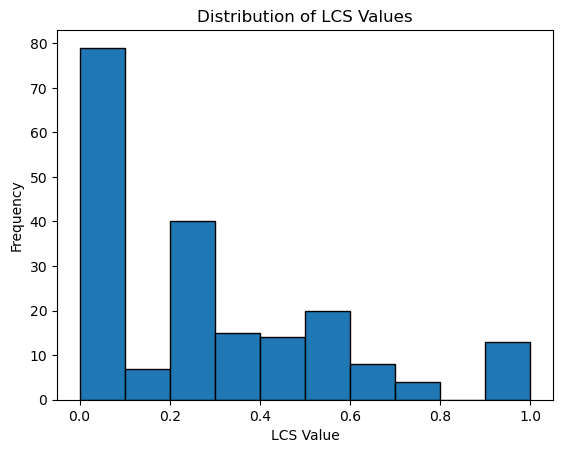

In [582]:
import matplotlib.pyplot as plt
plt.hist(lcs_ratios, bins=10, edgecolor='black')
plt.xlabel('LCS Value')
plt.ylabel('Frequency')
plt.title('Distribution of LCS Values')
plt.show()

In [576]:
llm_df

,symptoms
0,"[80, 201, 109, -1]"
1,"[-1, 163, 71, 213]"
2,"[-1, 113, 78, 188, 140]"
3,"[-1, 178, -2, -2]"
4,"[-1, 106, -2, -2, -2]"
...,...
195,"[0, -2]"
196,"[0, -2]"
197,"[137, -1]"
198,"[4, -2]"


In [577]:
ground_truth_df_2

,SYMPTOMS
0,"[80, 201, 109, 124]"
1,"[85, 71, 48, 213]"
2,"[148, 113, 78, 188, 140]"
3,"[28, 123, 229, 178]"
4,"[110, 167, 48, 105, 216]"
...,...
195,"[0, -2]"
196,"[0, -2]"
197,"[137, -2]"
198,"[21, -2]"


In [712]:
from difflib import SequenceMatcher
lcs_ratios_2 = []
for i in range(len(ground_truth_df_2)):
    ground_truth_seq = ground_truth_df_2.loc[i, 'SYMPTOMS']
    predicted_seq = llm_df.loc[i, 'symptoms']
    
    # Calculate LCS ratio for the current data point
    matcher = SequenceMatcher(None, ground_truth_seq, predicted_seq)
    lcs_ratio = matcher.ratio()
    lcs_ratios_2.append(lcs_ratio)

# Display the LCS ratios for each data point
lcs_ratios_2

[0.75,
 0.5,
 0.8,
 0.25,
 0.0,
 0.5,
 0.0,
 0.8,
 0.5,
 0.5,
 0.3333333333333333,
 0.8,
 0.6,
 0.8,
 0.8,
 0.8,
 0.8,
 1.0,
 1.0,
 0.8,
 0.8,
 0.8,
 0.8333333333333334,
 0.8,
 0.6,
 0.25,
 1.0,
 0.0,
 0.2,
 0.8,
 0.8,
 0.0,
 0.6,
 0.5,
 0.0,
 0.25,
 0.8,
 0.8,
 0.8,
 0.25,
 0.6,
 0.5,
 0.6,
 0.6,
 0.8,
 0.8,
 0.5,
 0.6,
 1.0,
 0.8,
 1.0,
 0.25,
 0.6,
 0.4,
 0.8,
 0.8,
 0.4,
 0.0,
 0.6,
 0.8,
 0.5,
 0.0,
 0.0,
 0.8,
 0.5,
 0.4,
 0.0,
 0.6,
 1.0,
 0.3333333333333333,
 0.25,
 0.3333333333333333,
 0.4,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.6,
 0.8,
 0.0,
 0.8,
 0.3333333333333333,
 0.6666666666666666,
 0.6,
 0.6,
 0.4,
 0.3333333333333333,
 0.0,
 0.0,
 0.25,
 0.0,
 0.4,
 0.6,
 0.6,
 0.25,
 0.6,
 0.4,
 0.3333333333333333,
 0.4,
 0.75,
 0.6,
 1.0,
 0.0,
 0.8,
 1.0,
 0.8,
 0.75,
 0.5,
 0.16666666666666666,
 0.3333333333333333,
 0.0,
 0.14285714285714285,
 0.0,
 0.0,
 1.0,
 0.8,
 0.4,
 0.5,
 0.3333333333333333,
 0.0,
 0.4,
 0.8,
 0.8,
 0.

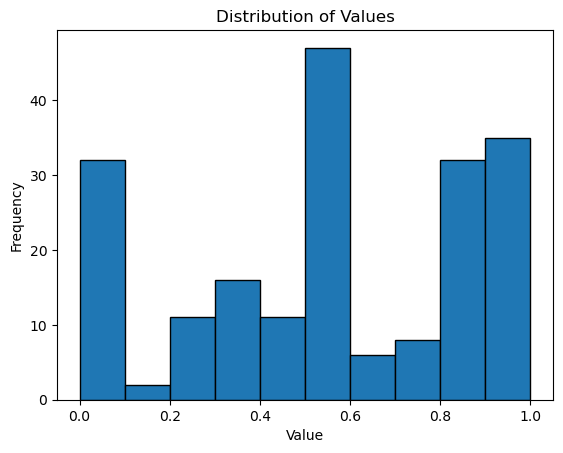

In [583]:
import matplotlib.pyplot as plt
plt.hist(lcs_ratios_2, bins=10, edgecolor='black', range=(0, 1))

# Label the axes and title the graph
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# Show the plot
plt.show()

DTW

In [585]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-macosx_11_0_arm64.whl size=89595 sha256=dbec50105bd33da5dec99d6a6f70a9cf356908d0f1f954dc8d135bcce1f35816
  Stored in directory: /Users/gunik/Library/Caches/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [586]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [596]:
ground_truth_seq = ground_truth_df.loc[6, 'SYMPTOMS']

In [597]:
ground_truth_seq

[212, 168, 187, 169, 35]

In [604]:
ground_truth_df['SYMPTOMS'].describe()

count         200
unique        181
top       [0, -2]
freq           11
Name: SYMPTOMS, dtype: object

In [605]:
NER_df['SYMPTOM_LIST'].describe()

count         200
unique        130
top       [0, -2]
freq           21
Name: SYMPTOM_LIST, dtype: object

In [690]:
# Calculate DTW distance for each data point
dtw_distances = []
def custom_distance(u, v):
    return np.linalg.norm(u - v)
for i in range(len(ground_truth_df)):
    ground_truth_seq = ground_truth_df.loc[i, 'SYMPTOMS']
    predicted_seq = NER_df.loc[i, 'SYMPTOM_LIST']
    
    
    ground_truth_seq_1d = [item for sublist in ground_truth_seq for item in sublist] if any(isinstance(i, list) for i in ground_truth_seq) else ground_truth_seq
    predicted_seq_1d = [item for sublist in predicted_seq for item in sublist] if any(isinstance(i, list) for i in predicted_seq) else predicted_seq
    ground_truth_seq_1d_np = np.array(ground_truth_seq_1d).flatten()
    predicted_seq_1d_np = np.array(predicted_seq_1d).flatten()
    if len(ground_truth_seq_1d_np) == 0 or len(predicted_seq_1d_np) == 0:
        continue

    # ground_truth_seq_1d_np = np.array(ground_truth_seq_1d)
    # predicted_seq_1d_np = np.array(predicted_seq_1d)

    # print("Shape of ground_truth_seq_1d:", ground_truth_seq_1d_np.shape)
    # print("Shape of predicted_seq_1d:", predicted_seq_1d_np.shape)
    # Calculate DTW distance for the current data point
    distance, path = fastdtw(ground_truth_seq_1d_np, predicted_seq_1d_np, dist=custom_distance)
    dtw_distances.append(distance)

# Display the DTW distances for each data point
dtw_distances


[521.0,
 328.0,
 676.0,
 559.0,
 547.0,
 339.0,
 305.0,
 389.0,
 225.0,
 589.0,
 814.0,
 263.0,
 574.0,
 928.0,
 724.0,
 491.0,
 425.0,
 712.0,
 447.0,
 220.0,
 825.0,
 363.0,
 501.0,
 546.0,
 374.0,
 169.0,
 526.0,
 150.0,
 486.0,
 407.0,
 606.0,
 234.0,
 405.0,
 224.0,
 555.0,
 774.0,
 237.0,
 344.0,
 91.0,
 197.0,
 525.0,
 167.0,
 263.0,
 672.0,
 209.0,
 412.0,
 537.0,
 364.0,
 636.0,
 749.0,
 585.0,
 364.0,
 549.0,
 340.0,
 286.0,
 513.0,
 669.0,
 317.0,
 429.0,
 316.0,
 496.0,
 241.0,
 153.0,
 240.0,
 384.0,
 501.0,
 144.0,
 236.0,
 770.0,
 585.0,
 633.0,
 404.0,
 511.0,
 619.0,
 274.0,
 293.0,
 306.0,
 491.0,
 808.0,
 174.0,
 475.0,
 469.0,
 571.0,
 1.0,
 246.0,
 372.0,
 350.0,
 179.0,
 300.0,
 282.0,
 439.0,
 280.0,
 824.0,
 219.0,
 544.0,
 363.0,
 493.0,
 783.0,
 400.0,
 392.0,
 197.0,
 400.0,
 552.0,
 305.0,
 580.0,
 390.0,
 328.0,
 552.0,
 43.0,
 173.0,
 301.0,
 204.0,
 443.0,
 160.0,
 243.0,
 397.0,
 256.0,
 239.0,
 444.0,
 511.0,
 379.0,
 595.0,
 517.0,
 533.0,
 235.0,
 131

In [695]:
print(np.mean(dtw_distances))
print(np.median(dtw_distances))

333.285
316.5


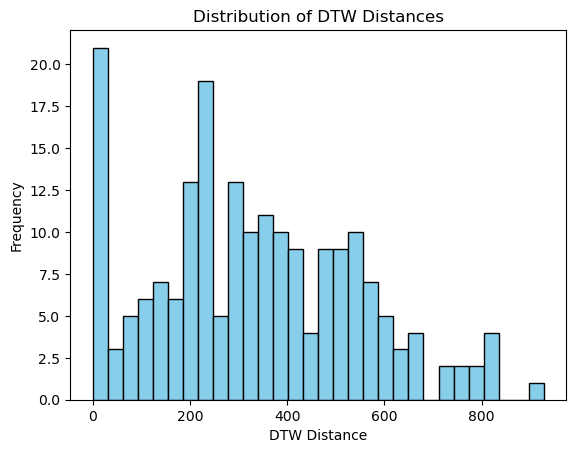

In [702]:
plt.hist(dtw_distances, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of DTW Distances')
plt.xlabel('DTW Distance')
plt.ylabel('Frequency')
plt.show()


In [618]:
from gensim.models import Word2Vec


In [616]:
!pip install gensim


  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.7.0 from https://files.pythonhosted.org/packages/0d/3e/d05b9de83677195886fb79844fcca19609a538db63b1790fa373155bc3cf/scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 kB 5.8 MB/s eta 0:00:00
  Obtaining dependency information for numpy>=1.18.5 from https://files.pythonhosted.org/packages/c0/bc/77635c657a3668cf652806210b8662e1aff84b818a55ba88257abf6637a8/numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for simpful==2.12.0 from https://files.p

In [621]:
filtered_NER

,VAERS_ID,SYMPTOM_TEXT_y,VAX_TYPE_y,SYMPTOM_LIST
0,2791086,approximately 15 minutes after receiving the m...,COVID19-2,"[-1, -1]"
1,2783222,numbness of anorectal malformation injection ...,COVID19,"[82, -1, -1, -1]"
2,2746570,worsening asthma symptoms sudden forceful coug...,COVID19,"[-1, -1]"
3,2799734,received these 3 vaccines at local pharmacy de...,COVID19,"[4, -1, -1, -1, -1]"
4,2798860,pt has red spot on lower arm covid toes swelli...,COVID19,"[-1, 106]"
...,...,...,...,...
195,2729253,updated coronavirus disease 2019 vaccine 2023-...,COVID19,[-1]
196,2729254,spikevax 2023-2024 formula patient had no symp...,COVID19,[0]
197,2729258,death after recent covid illness,COVID19,"[137, -1]"
198,2729823,i got the covid booster at 1230pm at 2pm afibs...,COVID19-2,[0]


In [622]:
df_for_vec = pd.read_csv('symptoms_truth.csv')

In [628]:
df_for_vec = df_for_vec.rename(columns={'Unnamed: 4': 'SYMPTOMS'})

In [629]:
df_for_vec

,VAERS_ID,symptoms,VAX_TYPE,SYMPTOM_TEXT,SYMPTOMS
0,2791086,"['abdominal pain', 'diarrhea', 'nausea', 'thro...",COVID19-2,Approximately 15 minutes after receiving the M...,"abdominal pain,diarrhea, nausea, sore throat"
1,2783222,"['arm numbness', 'hypertension', 'dizziness', ...",COVID19,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"arm pain, dizziness, swelling, shortness of br..."
2,2746570,"['worsening asthma symptoms', 'cough', 'bronch...",COVID19,"Worsening asthma symptoms, sudden forceful co...","asthama, cough, bronchitis, bloody nose, yello..."
3,2799734,"['Atrial fibrillation', 'Weakness', 'Near-sync...",COVID19,Received these 3 vaccines at local pharmacy. D...,"atrial fibirillation, weakness, syncope, MSK i..."
4,2798860,"['red spot', 'covid toes', 'eye swelling', 'it...",COVID19,"pt has red spot on lower arm, covid toes, swel...","blood spot, covid, swelling, ichiness, rashes"
...,...,...,...,...,...
195,2729253,[],COVID19,Updated COVID-19 vaccine (2023-2024) indicated...,NaN
196,2729254,[],COVID19,Spikevax 2023-2024 Formula. Patient had no sym...,NaN
197,2729258,"['death', 'COVID-19']",COVID19,Death after recent Covid illness,death
198,2729823,['atrial fibrillation'],COVID19-2,I got the covid booster at 12:30pm. At 2pm afi...,artirial fibrillation


In [630]:
df_for_vec = df_for_vec[['VAERS_ID','SYMPTOMS']]

In [631]:
df_for_vec

,VAERS_ID,SYMPTOMS
0,2791086,"abdominal pain,diarrhea, nausea, sore throat"
1,2783222,"arm pain, dizziness, swelling, shortness of br..."
2,2746570,"asthama, cough, bronchitis, bloody nose, yello..."
3,2799734,"atrial fibirillation, weakness, syncope, MSK i..."
4,2798860,"blood spot, covid, swelling, ichiness, rashes"
...,...,...
195,2729253,NaN
196,2729254,NaN
197,2729258,death
198,2729823,artirial fibrillation


In [632]:
# Assuming df_for_vec is your DataFrame
df_for_vec['SYMPTOMS'] = (
    df_for_vec['SYMPTOMS']  # Start with the column
    .fillna('')  # Replace NaN with empty strings
    .apply(lambda x: [symptom.strip() for symptom in x.split(',') if symptom])  # Split by ',' and strip whitespace
)

/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/3942094288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_vec['SYMPTOMS'] = (


In [633]:
df_for_vec

,VAERS_ID,SYMPTOMS
0,2791086,"[abdominal pain, diarrhea, nausea, sore throat]"
1,2783222,"[arm pain, dizziness, swelling, shortness of b..."
2,2746570,"[asthama, cough, bronchitis, bloody nose, yell..."
3,2799734,"[atrial fibirillation, weakness, syncope, MSK ..."
4,2798860,"[blood spot, covid, swelling, ichiness, rashes]"
...,...,...
195,2729253,[]
196,2729254,[]
197,2729258,[death]
198,2729823,[artirial fibrillation]


In [638]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

def embed_symptoms(symptoms_list):
    if not symptoms_list:  # Check if the list is empty
        return ''  # Return an empty string for empty symptom lists
    # Join symptoms into a single string
    symptoms_text = ', '.join(symptoms_list)
    # Tokenize the text
    inputs = tokenizer(symptoms_text, return_tensors="pt")
    # Get the embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the embeddings from the last hidden state
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    # Convert to a comma-separated string
    return ','.join(map(str, embeddings))

# Apply the embedding function to the SYMPTOMS column
df_for_vec['SYMPTOMS_EMBEDDED'] = df_for_vec['SYMPTOMS'].apply(embed_symptoms)


/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/270831027.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_vec['SYMPTOMS_EMBEDDED'] = df_for_vec['SYMPTOMS'].apply(embed_symptoms)


In [637]:
df_for_vec

,VAERS_ID,SYMPTOMS,SYMPTOMS_EMBEDDED
0,2791086,"[abdominal pain, diarrhea, nausea, sore throat]","0.027406957,0.39949068,-0.27806324,0.17377329,..."
1,2783222,"[arm pain, dizziness, swelling, shortness of b...","0.23429623,0.40485257,-0.23606616,0.07056524,0..."
2,2746570,"[asthama, cough, bronchitis, bloody nose, yell...","0.18770002,-0.17635645,-0.083584115,0.11760629..."
3,2799734,"[atrial fibirillation, weakness, syncope, MSK ...","0.092556864,0.18597218,-0.23225085,-0.09643134..."
4,2798860,"[blood spot, covid, swelling, ichiness, rashes]","0.40034148,-0.0012218461,-0.27810428,0.2670070..."
...,...,...,...
195,2729253,[],"0.78679216,-0.2523268,-0.07481635,0.5381679,-0..."
196,2729254,[],"0.78679216,-0.2523268,-0.07481635,0.5381679,-0..."
197,2729258,[death],"0.0007028083,0.45359114,-0.4053289,-0.33962035..."
198,2729823,[artirial fibrillation],"0.049044654,0.44708925,-0.13291465,0.098002434..."


In [642]:
filtered_NER = pd.read_csv('symptoms_with_labels.csv')
merged = pd.merge(df, filtered_NER, on='VAERS_ID', how="inner")
filtered_NER =  merged[['VAERS_ID','SYMPTOM_TEXT_y','VAX_TYPE_y','SYMPTOM_LIST']]
import ast
filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(ast.literal_eval)

print(type(filtered_NER))
filtered_NER['SYMPTOM_LIST']

<class 'pandas.core.frame.DataFrame'>


/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/3942154683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_NER['SYMPTOM_LIST'] = filtered_NER['SYMPTOM_LIST'].apply(ast.literal_eval)


0      [abdominal pain diarrhea nausea tightness, thr...
1      [numbness, anorectal malformation, hypertensio...
2           [asthma symptoms sudden, nose yellow phlegm]
3      [atrial fibrillation, weakness near-syncope, m...
4                            [covid toes swelling, rash]
                             ...                        
195                                [coronavirus disease]
196                                                   []
197                               [death, covid illness]
198                                                   []
199                                        [itchy, rash]
Name: SYMPTOM_LIST, Length: 200, dtype: object

In [647]:

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

def embed_symptoms(symptoms_list):
    if not symptoms_list:  # Check if the list is empty
        return ''  # Return an empty string for empty symptom lists
    # Join symptoms into a single string
    symptoms_text = ', '.join(symptoms_list)
    # Tokenize the text with truncation
    inputs = tokenizer(symptoms_text, return_tensors="pt", truncation=True, max_length=512)
    # Get the embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the embeddings from the last hidden state
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    # Convert to a comma-separated string
    return ','.join(map(str, embeddings))

# Assuming filtered_NER is your DataFrame
filtered_NER['embedded'] = filtered_NER['SYMPTOM_LIST'].apply(embed_symptoms)

/var/folders/09/kkd4kch12b35yvx1xk3m4gr00000gn/T/ipykernel_71208/1250563055.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_NER['embedded'] = filtered_NER['SYMPTOM_LIST'].apply(embed_symptoms)


In [648]:
filtered_NER

,VAERS_ID,SYMPTOM_TEXT_y,VAX_TYPE_y,SYMPTOM_LIST,embedded
0,2791086,approximately 15 minutes after receiving the m...,COVID19-2,"[abdominal pain diarrhea nausea tightness, thr...","0.005029752,0.53987396,-0.43588036,0.23600942,..."
1,2783222,numbness of anorectal malformation injection ...,COVID19,"[numbness, anorectal malformation, hypertensio...","-0.092242785,0.32253915,-0.3562649,0.10028984,..."
2,2746570,worsening asthma symptoms sudden forceful coug...,COVID19,"[asthma symptoms sudden, nose yellow phlegm]","0.19988558,-0.16817813,-0.16149795,0.20067732,..."
3,2799734,received these 3 vaccines at local pharmacy de...,COVID19,"[atrial fibrillation, weakness near-syncope, m...","0.121651605,0.3018708,-0.21677603,-0.1202187,0..."
4,2798860,pt has red spot on lower arm covid toes swelli...,COVID19,"[covid toes swelling, rash]","0.5790008,-0.24772967,-0.24765089,0.21923701,0..."
...,...,...,...,...,...
195,2729253,updated coronavirus disease 2019 vaccine 2023-...,COVID19,[coronavirus disease],"0.23220508,0.25671646,0.005141591,-0.13060938,..."
196,2729254,spikevax 2023-2024 formula patient had no symp...,COVID19,[],
197,2729258,death after recent covid illness,COVID19,"[death, covid illness]","0.11315424,-0.01259811,-0.25857833,-0.01715837..."
198,2729823,i got the covid booster at 1230pm at 2pm afibs...,COVID19-2,[],


In [705]:
def custom_distance(u, v):
    return np.linalg.norm(u - v)

for i in range(len(df_for_vec)):
    ground_truth_seq = df_for_vec.loc[i, 'SYMPTOMS_EMBEDDED']
    predicted_seq = filtered_NER.loc[i, 'embedded']
    ground_truth_seq_1d = [item for sublist in ground_truth_seq for item in sublist] if any(isinstance(i, list) for i in ground_truth_seq) else ground_truth_seq
    predicted_seq_1d = [item for sublist in predicted_seq for item in sublist] if any(isinstance(i, list) for i in predicted_seq) else predicted_seq
    # ground_truth_seq_1d_np = np.array(ground_truth_seq_1d,dtype=float)
    # predicted_seq_1d_np = np.array(predicted_seq_1d,dtype=float)
    if len(ground_truth_seq_1d) == 0 or len(predicted_seq_1d) == 0:
        continue
    ground_truth_seq_1d_np = [float(x) for x in ground_truth_seq_1d.split(',')]
    predicted_seq_1d_np = [float(x) for x in predicted_seq_1d.split(',')]

    

    # Calculate DTW distance for the current data point
    distance, path = fastdtw(ground_truth_seq_1d_np, predicted_seq_1d_np, dist=custom_distance)
    dtw_distances.append(distance)

# Display the DTW distances for each data point
print(dtw_distances)

[521.0, 328.0, 676.0, 559.0, 547.0, 339.0, 305.0, 389.0, 225.0, 589.0, 814.0, 263.0, 574.0, 928.0, 724.0, 491.0, 425.0, 712.0, 447.0, 220.0, 825.0, 363.0, 501.0, 546.0, 374.0, 169.0, 526.0, 150.0, 486.0, 407.0, 606.0, 234.0, 405.0, 224.0, 555.0, 774.0, 237.0, 344.0, 91.0, 197.0, 525.0, 167.0, 263.0, 672.0, 209.0, 412.0, 537.0, 364.0, 636.0, 749.0, 585.0, 364.0, 549.0, 340.0, 286.0, 513.0, 669.0, 317.0, 429.0, 316.0, 496.0, 241.0, 153.0, 240.0, 384.0, 501.0, 144.0, 236.0, 770.0, 585.0, 633.0, 404.0, 511.0, 619.0, 274.0, 293.0, 306.0, 491.0, 808.0, 174.0, 475.0, 469.0, 571.0, 1.0, 246.0, 372.0, 350.0, 179.0, 300.0, 282.0, 439.0, 280.0, 824.0, 219.0, 544.0, 363.0, 493.0, 783.0, 400.0, 392.0, 197.0, 400.0, 552.0, 305.0, 580.0, 390.0, 328.0, 552.0, 43.0, 173.0, 301.0, 204.0, 443.0, 160.0, 243.0, 397.0, 256.0, 239.0, 444.0, 511.0, 379.0, 595.0, 517.0, 533.0, 235.0, 131.0, 367.0, 404.0, 316.0, 227.0, 120.0, 148.0, 5.0, 368.0, 678.0, 1.0, 477.0, 302.0, 339.0, 334.0, 233.0, 244.0, 34.0, 134.0, 

In [706]:
print(np.mean(dtw_distances))
print(np.median(dtw_distances))

191.3193464943327
124.04740663259949


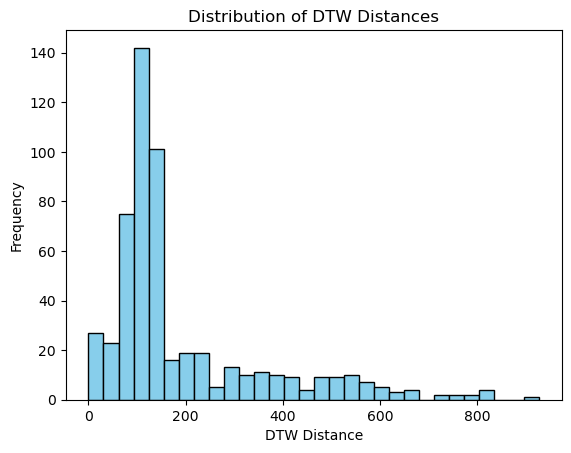

In [707]:
plt.hist(dtw_distances, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of DTW Distances')
plt.xlabel('DTW Distance')
plt.ylabel('Frequency')
plt.show()


In [667]:
llm = pd.read_csv('symptoms_truth.csv')
llm = llm[['VAERS_ID','SYMPTOM_TEXT','symptoms']]
import ast
llm['symptoms'] = llm['symptoms'].apply(ast.literal_eval)


In [669]:
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

def embed_symptoms(symptoms_list):
    if not symptoms_list:  # Check if the list is empty
        return ''  # Return an empty string for empty symptom lists
    # Join symptoms into a single string
    symptoms_text = ', '.join(symptoms_list)
    # Tokenize the text with truncation
    inputs = tokenizer(symptoms_text, return_tensors="pt", truncation=True, max_length=512)
    # Get the embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the embeddings from the last hidden state
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    # Convert to a comma-separated string
    return ','.join(map(str, embeddings))

# Assuming filtered_NER is your DataFrame
llm['embedded'] = llm['symptoms'].apply(embed_symptoms)

In [670]:
llm

,VAERS_ID,SYMPTOM_TEXT,symptoms,embedded
0,2791086,Approximately 15 minutes after receiving the M...,"[abdominal pain, diarrhea, nausea, throat tigh...","0.001054848,0.454849,-0.2783452,0.21477434,-0...."
1,2783222,NUMBNESS OF ARM ( INJECTION SITE ) HTN DIZZINE...,"[arm numbness, hypertension, dizziness, leg sw...","0.03396096,0.37041044,-0.037441567,-0.06182778..."
2,2746570,"Worsening asthma symptoms, sudden forceful co...","[worsening asthma symptoms, cough, bronchitis,...","0.14583336,-0.09621044,-0.11977173,0.17572926,..."
3,2799734,Received these 3 vaccines at local pharmacy. D...,"[Atrial fibrillation, Weakness, Near-syncope, ...","0.16355635,0.24139446,-0.14443499,-0.09096239,..."
4,2798860,"pt has red spot on lower arm, covid toes, swel...","[red spot, covid toes, eye swelling, itching, ...","0.29439726,-0.11333178,-0.34703302,0.21323314,..."
...,...,...,...,...
195,2729253,Updated COVID-19 vaccine (2023-2024) indicated...,[],
196,2729254,Spikevax 2023-2024 Formula. Patient had no sym...,[],
197,2729258,Death after recent Covid illness,"[death, COVID-19]","0.102451146,0.17601205,-0.19392148,0.254716,0...."
198,2729823,I got the covid booster at 12:30pm. At 2pm afi...,[atrial fibrillation],"0.10824619,0.5476299,-0.12390854,-0.043532312,..."


In [708]:
def custom_distance(u, v):
    return np.linalg.norm(u - v)

for i in range(len(df_for_vec)):
    ground_truth_seq = df_for_vec.loc[i, 'SYMPTOMS_EMBEDDED']
    predicted_seq = llm.loc[i, 'embedded']
    ground_truth_seq_1d = [item for sublist in ground_truth_seq for item in sublist] if any(isinstance(i, list) for i in ground_truth_seq) else ground_truth_seq
    predicted_seq_1d = [item for sublist in predicted_seq for item in sublist] if any(isinstance(i, list) for i in predicted_seq) else predicted_seq
    # ground_truth_seq_1d_np = np.array(ground_truth_seq_1d,dtype=float)
    # predicted_seq_1d_np = np.array(predicted_seq_1d,dtype=float)
    if len(ground_truth_seq_1d) == 0 or len(predicted_seq_1d) == 0:
        continue
    ground_truth_seq_1d_np = [float(x) for x in ground_truth_seq_1d.split(',')]
    predicted_seq_1d_np = [float(x) for x in predicted_seq_1d.split(',')]

    

    # Calculate DTW distance for the current data point
    distance, path = fastdtw(ground_truth_seq_1d_np, predicted_seq_1d_np, dist=custom_distance)
    dtw_distances.append(distance)

# Display the DTW distances for each data point
print(dtw_distances)

[521.0, 328.0, 676.0, 559.0, 547.0, 339.0, 305.0, 389.0, 225.0, 589.0, 814.0, 263.0, 574.0, 928.0, 724.0, 491.0, 425.0, 712.0, 447.0, 220.0, 825.0, 363.0, 501.0, 546.0, 374.0, 169.0, 526.0, 150.0, 486.0, 407.0, 606.0, 234.0, 405.0, 224.0, 555.0, 774.0, 237.0, 344.0, 91.0, 197.0, 525.0, 167.0, 263.0, 672.0, 209.0, 412.0, 537.0, 364.0, 636.0, 749.0, 585.0, 364.0, 549.0, 340.0, 286.0, 513.0, 669.0, 317.0, 429.0, 316.0, 496.0, 241.0, 153.0, 240.0, 384.0, 501.0, 144.0, 236.0, 770.0, 585.0, 633.0, 404.0, 511.0, 619.0, 274.0, 293.0, 306.0, 491.0, 808.0, 174.0, 475.0, 469.0, 571.0, 1.0, 246.0, 372.0, 350.0, 179.0, 300.0, 282.0, 439.0, 280.0, 824.0, 219.0, 544.0, 363.0, 493.0, 783.0, 400.0, 392.0, 197.0, 400.0, 552.0, 305.0, 580.0, 390.0, 328.0, 552.0, 43.0, 173.0, 301.0, 204.0, 443.0, 160.0, 243.0, 397.0, 256.0, 239.0, 444.0, 511.0, 379.0, 595.0, 517.0, 533.0, 235.0, 131.0, 367.0, 404.0, 316.0, 227.0, 120.0, 148.0, 5.0, 368.0, 678.0, 1.0, 477.0, 302.0, 339.0, 334.0, 233.0, 244.0, 34.0, 134.0, 

giving sneha dataset


In [709]:
print(np.mean(dtw_distances))
print(np.median(dtw_distances))

158.31769676878412
109.19132213034501


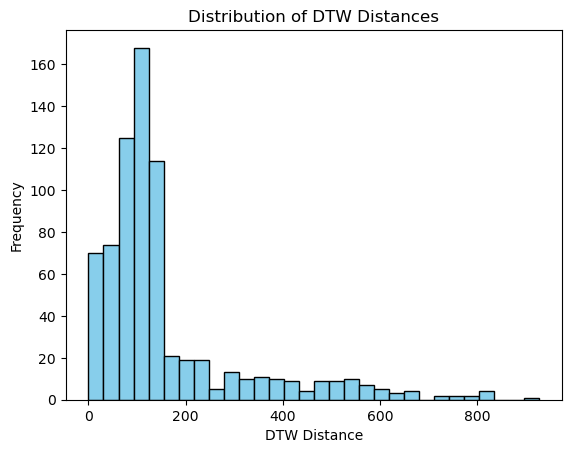

In [710]:
plt.hist(dtw_distances, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of DTW Distances')
plt.xlabel('DTW Distance')
plt.ylabel('Frequency')
plt.show()


In [675]:
data = pd.read_csv('symptoms_ground_truth_10000.csv')

In [676]:
data

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,2728994,Injection site pain,Loss of personal independence in daily activities,Pain in extremity,X-ray,NaN
1,2729004,Angiogram,Angiogram cerebral,Aphasia,Blood glucose,CSF cell count
2,2729006,Alpha haemolytic streptococcal infection,Blood culture positive,Chills,Computerised tomogram thorax abnormal,Endocarditis
3,2729010,Chills,Decreased appetite,Diarrhoea,Fatigue,Night sweats
4,2729014,Arthralgia,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
15899,2802236,Product storage error,NaN,NaN,NaN,NaN
15900,2802237,Product storage error,NaN,NaN,NaN,NaN
15901,2802238,Product storage error,NaN,NaN,NaN,NaN
15902,2802239,Product storage error,NaN,NaN,NaN,NaN


In [687]:
data = data[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

In [688]:
data.to_csv('symptoms_t_15904.csv',index=False)

In [680]:
vaers_id = pd.DataFrame(vaers_id)

In [681]:
vaers_id

,VAERS_ID
0,2791086
1,2783222
2,2746570
3,2799734
4,2798860
...,...
195,2729253
196,2729254
197,2729258
198,2729823


In [682]:
merged = pd.merge(vaers_id,data , on='VAERS_ID',how='inner')

In [683]:
merged

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,2791086,Abdominal pain,Diarrhoea,Nausea,Paraesthesia oral,Throat tightness
1,2783222,Dizziness,Dyspnoea,Hypertension,Injection site hypoaesthesia,Peripheral swelling
2,2746570,Asthma,Bronchitis,Condition aggravated,Cough,Epistaxis
3,2799734,Asthenia,Atrial fibrillation,Fall,Musculoskeletal injury,Presyncope
4,2798860,Erythema,Eye swelling,Immunisation reaction,Pruritus,Rash erythematous
...,...,...,...,...,...,...
195,2729253,Product administered to patient of inappropria...,Wrong product administered,NaN,NaN,NaN
196,2729254,No adverse event,NaN,NaN,NaN,NaN
197,2729258,COVID-19,Death,SARS-CoV-2 test,NaN,NaN
198,2729823,Atrial fibrillation,Condition aggravated,NaN,NaN,NaN


In [684]:
df_symptoms_truth = merged[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

In [685]:
df_symptoms_truth

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,2791086,Abdominal pain,Diarrhoea,Nausea,Paraesthesia oral,Throat tightness
1,2783222,Dizziness,Dyspnoea,Hypertension,Injection site hypoaesthesia,Peripheral swelling
2,2746570,Asthma,Bronchitis,Condition aggravated,Cough,Epistaxis
3,2799734,Asthenia,Atrial fibrillation,Fall,Musculoskeletal injury,Presyncope
4,2798860,Erythema,Eye swelling,Immunisation reaction,Pruritus,Rash erythematous
...,...,...,...,...,...,...
195,2729253,Product administered to patient of inappropria...,Wrong product administered,NaN,NaN,NaN
196,2729254,No adverse event,NaN,NaN,NaN,NaN
197,2729258,COVID-19,Death,SARS-CoV-2 test,NaN,NaN
198,2729823,Atrial fibrillation,Condition aggravated,NaN,NaN,NaN


In [686]:
df_symptoms_truth.to_csv('symptoms_truth_200.csv',index=False)